# Experiment  1: Analysis of the algorithms
This experiment is designed to analyse the intrinsic behaviour of the algorithms individually. 
## 1.1 POP
The POP algorithm assumes that keeping boundary points only can already ensure simple machine learning algorithms like knn and logistic regression to recover the desired decision boundary. Many papers have proved this hypothesis with critical experiments. However, for deep learning, the performance is still unknown. If we consider the network as extracting features first and classify the features with a logistic regression algorithm, then the problem is whether the network can extract high-quality features or not with POP selected samples. Please note that the POP is not expected to get the same extracted features because of the randomness of deep learning.

For the generated blob dataset, the weakness countplot is shown below. Recall that the weakness is defined as the number of times that a sample is not a boundary sample by projecting the features to each axis. Therefore, only samples with weakness equal to 2 are purely inner samples. The right plot shows the selected samples in green. It indicates that if the classifier can separate the selected points, then it should be able to separate all the other samples as well. Actually, the test accuracy is
99.5% if we use early stop method by selecting the model that can achieve the highest validation accuracy.

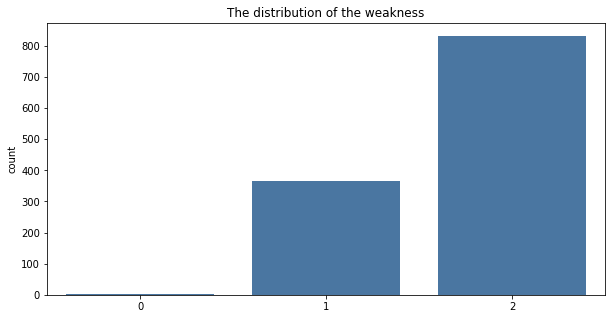
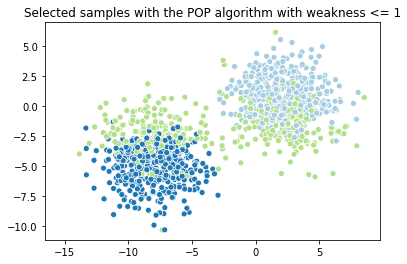


However, for higher-order feature dimensions, there are less purely inner samples as defined by POP. The countplots of CIFAR10 (left) and CIFAR100 (right) are shown below.
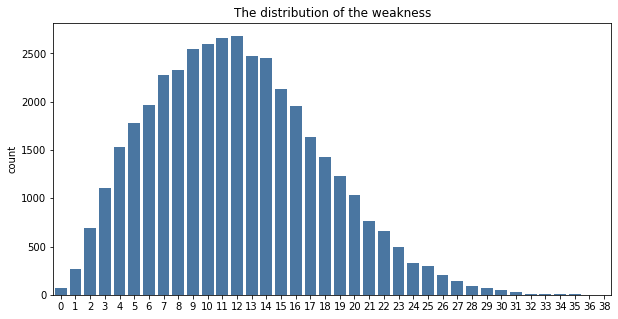
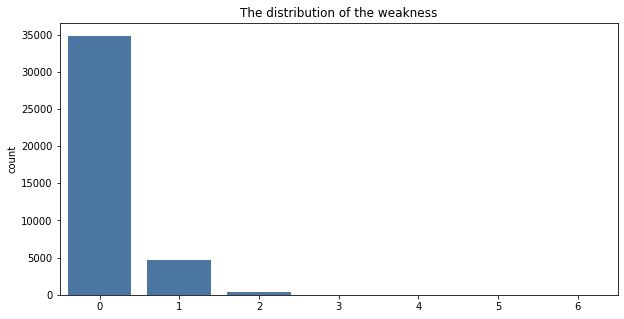

For CIFAR10 and CIFAR100, there are no purely inner samples (weakness == 128 since we use 128-dimensional features). Thus POP is less efficient for datasets with more classes and features.

Also, the circles(left) and the moons (right)  POP weakness countplots are shown below. It is clear that the reduction rate of POP is highly contained by the geometric location of the samples. If the samples are not separatable after projecting them into a single axis, then POP is not a suitable algorithm. 

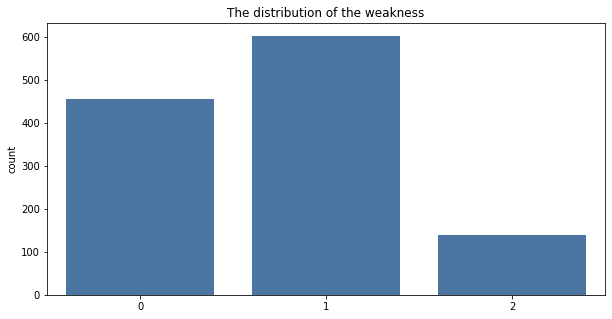
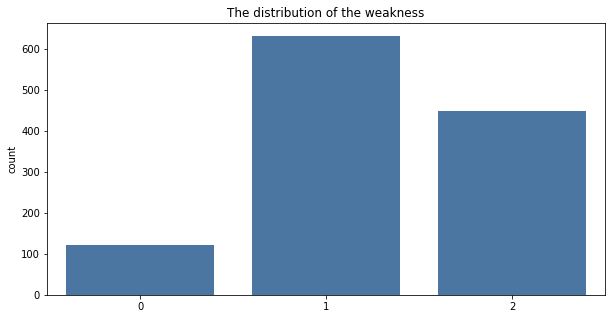

I varied the weakness threshold for CIFAR10 and CIFAR100 to see what will happen if I decide to remove not purely inner samples. The classification accuracy for CIFAR10 is shown in the table below. For CIFAR10, the results are still acceptable. However, for CIFAR100, it is meaningless to use POP because with weakness == 0 (pure boundary samples), there are already more than 85% samples selected and the relative accuracy is close to 1.

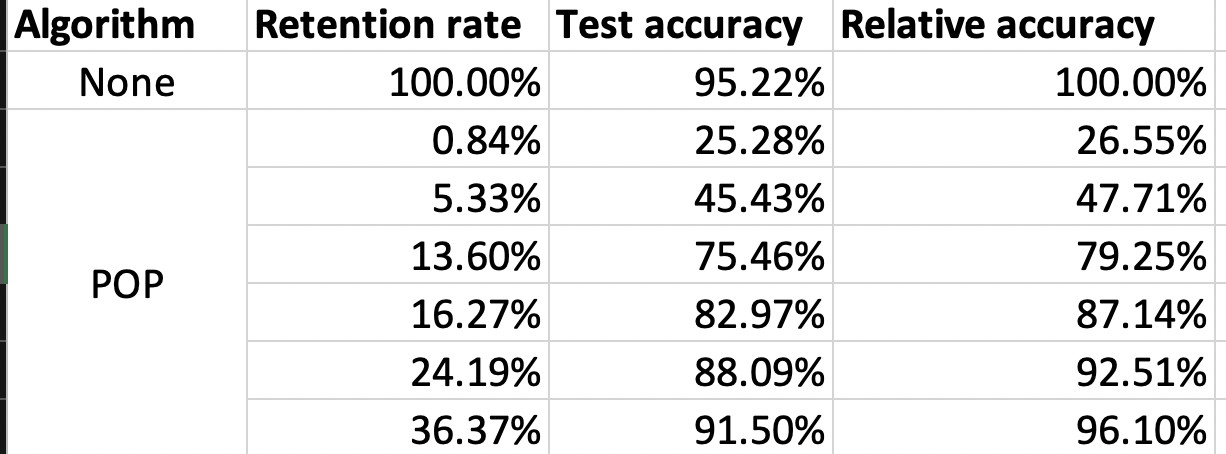

There are two possible ways to improve the POP algorithm performance. The first way is to remove the BatchNormalisation layer of the pre-trained feature extraction network so that the difference between feature values are higher and it would be easier to avoid samples with closer feature values but different class labels. The other way is to lower the numpy.isclose() tolerance so that samples with similar features will be considered as non-boundary samples. 

## 1.2 EGDIS